In [1]:
%load_ext autoreload

In [2]:
import os, sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")

In [3]:
BASE_PATH = os.path.join(os.getcwd(), "..", "..")
MODULES_PATH = os.path.join(BASE_PATH, "modules")
METRICS_PATH = os.path.join(BASE_PATH, "metrics")
STAT_PATH = os.path.join(BASE_PATH, "stats", "local")

In [4]:
sys.path.append(MODULES_PATH)
sys.path.append(os.path.join(BASE_PATH, "tf_al"))

In [5]:
%autoreload 2
from tf_al import ExperimentSuitMetrics
from utils import MetricsTransformer, Frame, ExperimentFrame, FrameScores, Stats

In [6]:
dtypes = {
    "run": int,
    "iteration": int,
    "train_time": float,
    "eval_sparse_categorical_crossentropy": float,
    "eval_sparse_categorical_accuracy": float,
    "query_time": float,
    "labeled_pool_size": int,
    "unlabeled_pool_size": int,
    "method": str
}

# Mc Dropout

In [7]:
# Results of experiments with step size of 10
EXPERIMENT_PATH_10 = os.path.join(METRICS_PATH, "mnist_local")
metrics_handler_10 = ExperimentSuitMetrics(EXPERIMENT_PATH_10)
df_mc = MetricsTransformer.load_from_dir(metrics_handler_10, "mc_dropout", dtype=dtypes)
scores = FrameScores(accuracy_column="eval_sparse_categorical_accuracy")
mc_frame_10 = ExperimentFrame(df_mc, scores=scores)

/home/exleonem/.anaconda/envs/active_learning/lib/python3.8/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [8]:
# Results of experiments with step size of 5
EXPERIMENT_PATH_5 = os.path.join(METRICS_PATH, "mnist_step_5")
metrics_handler_5 = ExperimentSuitMetrics(EXPERIMENT_PATH_5)
df_mc_5 = MetricsTransformer.load_from_dir(metrics_handler_5, "mc_dropout", dtype=dtypes)
mc_5_scores = FrameScores(accuracy_column="eval_sparse_categorical_accuracy")
mc_5_frame = ExperimentFrame(df_mc_5, scores=scores)

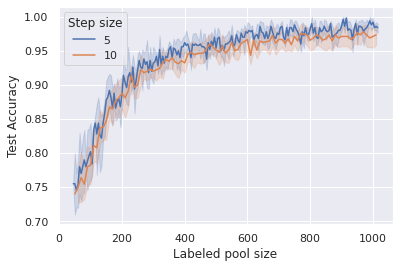

In [9]:
# Comparison of accuracy increase per step size
mc_5 = mc_5_frame.get_frame().copy()
mc_10 = mc_frame_10.get_frame().copy()

mc_5.insert(0, "step_size", "5")
mc_10.insert(0, "step_size", "10")

acc_key = "eval_sparse_categorical_accuracy"
mc_comp_frame = pd.concat([mc_5, mc_10], sort=True)
sel = np.logical_and(mc_comp_frame[acc_key] > 0.7, mc_comp_frame["method"] == "BALD")
fig = sns.lineplot(data=mc_comp_frame[sel], x="labeled_pool_size", y=acc_key, hue="step_size")
fig.set(xlabel="Labeled pool size", ylabel="Test Accuracy")
fig.legend(title="Step size")

# Moment Propagation

In [10]:
df_mp_10 = MetricsTransformer.load_from_dir(metrics_handler_10, "moment_propagation", dtype=dtypes)
scores = FrameScores(accuracy_column="eval_sparse_categorical_accuracy")
mp_frame_10 = ExperimentFrame(df_mp_10, scores=scores)

/home/exleonem/.anaconda/envs/active_learning/lib/python3.8/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [11]:
df_mp_5 = MetricsTransformer.load_from_dir(metrics_handler_5, "moment_propagation", dtype=dtypes)
scores = FrameScores(accuracy_column="eval_sparse_categorical_accuracy")
mp_frame_5 = ExperimentFrame(df_mp_5, scores=scores)

In [13]:
EXPERIMENT_PATH_1 = os.path.join(METRICS_PATH, "mnist_step_1")
metrics_handler_1 = ExperimentSuitMetrics(EXPERIMENT_PATH_1)
df_mp_1 = MetricsTransformer.load_from_dir(metrics_handler_1, "moment_propagation", dtype=dtypes)
scores = FrameScores(accuracy_column="eval_sparse_categorical_accuracy")
mp_frame_1 = ExperimentFrame(df_mp_1, scores=scores)

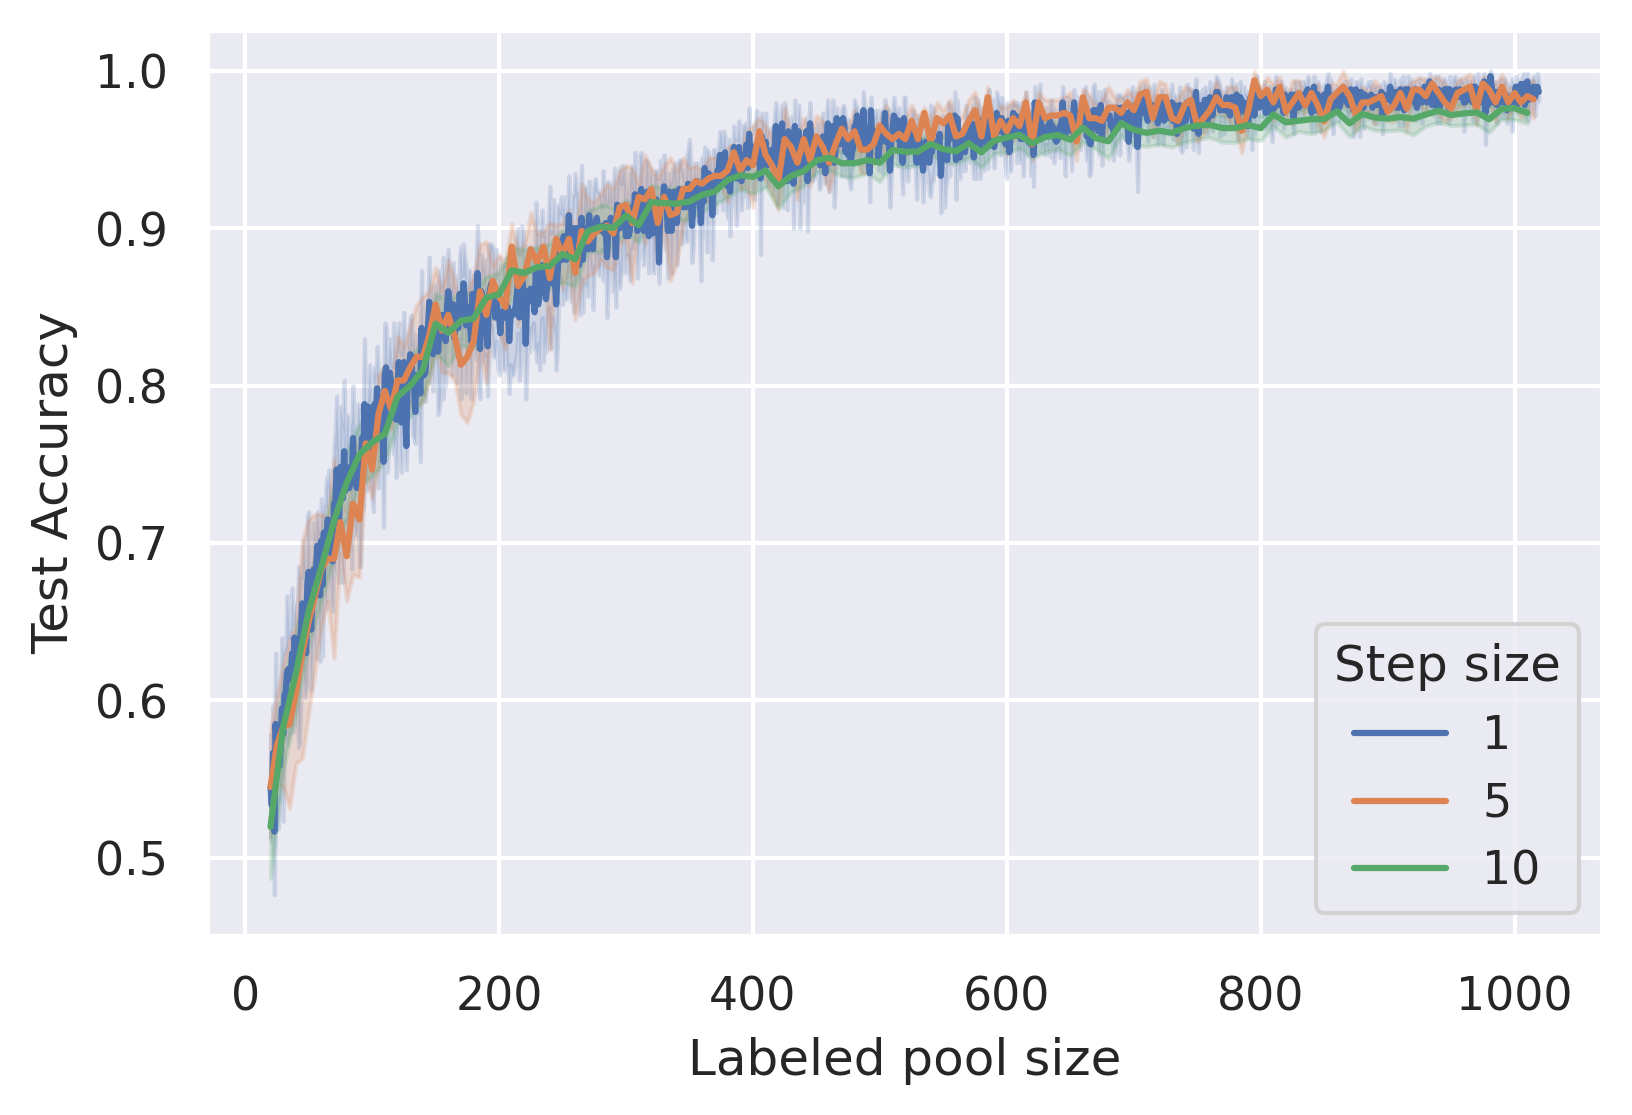

In [32]:
mp_1 = mp_frame_1.get_frame().copy()
mp_5 = mp_frame_5.get_frame().copy()
mp_10 = mp_frame_10.get_frame().copy()

pre_filter = mp_10["run"] <= 5
mp_10 = mp_10[pre_filter]

mp_1.insert(0, "step_size", "1")
mp_5.insert(0, "step_size", "5")
mp_10.insert(0, "step_size", "10")

acc_key = "eval_sparse_categorical_accuracy"
mp_comp_frame = pd.concat([mp_1, mp_5, mp_10], sort=True)

plt.figure(dpi=300)
sel = np.logical_and(mp_comp_frame["labeled_pool_size"] > 0.7, mp_comp_frame["method"] == "BALD")
fig = sns.lineplot(data=mp_comp_frame, x="labeled_pool_size", y=acc_key, hue="step_size")
fig.set(xlabel="Labeled pool size", ylabel="Test Accuracy")
fig.legend(title="Step size")
plt.savefig(os.path.join(STAT_PATH, "mp_step_size_bald.png"))

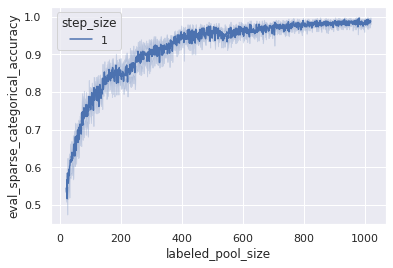

In [33]:
fig = sns.lineplot(data=mp_1, x="labeled_pool_size", y=acc_key, hue="step_size")

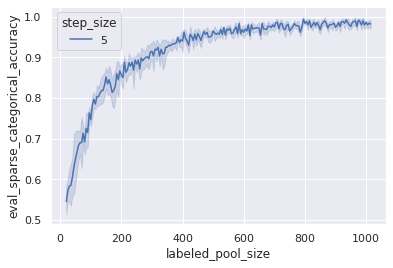

In [34]:
fig = sns.lineplot(data=mp_5, x="labeled_pool_size", y=acc_key, hue="step_size")

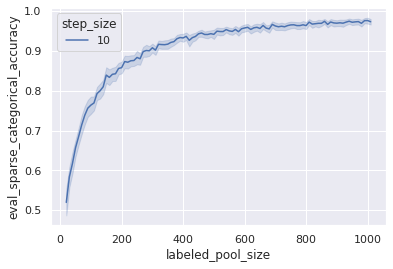

In [35]:
fig = sns.lineplot(data=mp_10, x="labeled_pool_size", y=acc_key, hue="step_size")